In [14]:
import sys 
sys.path.append('../..')

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mstats

In [20]:
min_temp_M = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='TEMP_MOD').drop(columns=['Week'])
min_prec_M = pd.read_excel('../../input/MinClimate_MODIFIED.xlsx', sheet_name='PREC_MOD').drop(columns=['Week'])

In [22]:
filtered_prec_10 = min_prec_M[min_temp_M>=10]
filtered_prec_10['Month'] = min_prec_M['Month']
filtered_prec_10['Day'] = min_prec_M['Day']
filtered_temp_10 = min_temp_M[min_temp_M>=10]
filtered_temp_10['Month'] = min_temp_M['Month']
filtered_temp_10['Day'] = min_temp_M['Day']

In [23]:
filtered_prec_5 = min_prec_M[min_temp_M>=5]
filtered_prec_5['Month'] = min_prec_M['Month']
filtered_prec_5['Day'] = min_prec_M['Day']
filtered_temp_5 = min_temp_M[min_temp_M>=5]
filtered_temp_5['Month'] = min_temp_M['Month']
filtered_temp_5['Day'] = min_temp_M['Day']

In [24]:
filtered_prec_0 = min_prec_M[min_temp_M>=0]
filtered_prec_0['Month'] = min_prec_M['Month']
filtered_prec_0['Day'] = min_prec_M['Day']
filtered_temp_0 = min_temp_M[min_temp_M>=0]
filtered_temp_0['Month'] = min_temp_M['Month']
filtered_temp_0['Day'] = min_temp_M['Day']

# Monthly

In [27]:
monthly_htc_10 = pd.DataFrame({'Year':list(min_prec_M.columns[2:])})
monthly_htc_5 = pd.DataFrame({'Year':list(min_prec_M.columns[2:])})
monthly_htc_0 = pd.DataFrame({'Year':list(min_prec_M.columns[2:])})

months = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
    -1: 'Dec prev',
    -2: 'Nov prev',
    -3: 'Oct prev',
    -4: 'Sep prev',
    -5: 'Aug prev',
}

for i in months.keys():
    monthly_htc_10[months[i]] = list(filtered_prec_10[filtered_prec_10['Month']==i].sum(skipna=True)[2:] * 10 / filtered_temp_10[filtered_temp_10['Month']==i].sum(skipna=True)[2:])
    monthly_htc_5[months[i]] = list(filtered_prec_5[filtered_prec_5['Month']==i].sum(skipna=True)[2:] * 10 / filtered_temp_5[filtered_temp_5['Month']==i].sum(skipna=True)[2:])
    monthly_htc_0[months[i]] = list(filtered_prec_0[filtered_prec_0['Month']==i].sum(skipna=True)[2:] * 10 / filtered_temp_0[filtered_temp_0['Month']==i].sum(skipna=True)[2:])
    

In [34]:
monthly_prec = pd.read_excel('../../input/MinClimateMonthly.xlsx', sheet_name='Prec')

In [35]:
monthly_htc_10['Class'] = monthly_prec['Class']
monthly_htc_5['Class'] = monthly_prec['Class']
monthly_htc_0['Class'] = monthly_prec['Class']

In [40]:
c1 = monthly_htc_10[monthly_htc_10['Class']==1]
c2 = monthly_htc_10[monthly_htc_10['Class']==2]
c3 = monthly_htc_10[monthly_htc_10['Class']==3]
c4 = monthly_htc_10[monthly_htc_10['Class']==4]

with open('../../output/htc_10_monthly.csv', 'w') as ouf:
    ouf.write('Month,Stat,PValue\n')
    for column in monthly_htc_10.columns:
        if column in ['Year', 'Class']:
            continue
        #kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
        try:
            kruskalwallis = mstats.kruskalwallis(list(c3[column].dropna()), list(c4[column].dropna()))
            ouf.write(f"{column},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
            if kruskalwallis.pvalue < 0.05:
                #print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
                #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
                plt.boxplot([c3[column].dropna(), c4[column].dropna()], labels=['3', '4'])
                plt.title("HTC 10 "+ column)
                plt.show()
        except:
            ouf.write(f"{column},,\n")

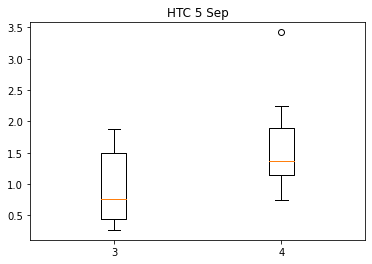

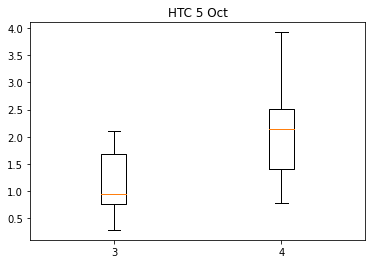

In [44]:
c1 = monthly_htc_5[monthly_htc_5['Class']==1]
c2 = monthly_htc_5[monthly_htc_5['Class']==2]
c3 = monthly_htc_5[monthly_htc_5['Class']==3]
c4 = monthly_htc_5[monthly_htc_5['Class']==4]

with open('../../output/htc_5_monthly.csv', 'w') as ouf:
    ouf.write('Month,Stat,PValue\n')
    for column in monthly_htc_5.columns:
        if column in ['Year', 'Class']:
            continue
        #kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
        try:
            kruskalwallis = mstats.kruskalwallis(list(c3[column].dropna()), list(c4[column].dropna()))
            ouf.write(f"{column},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
            if kruskalwallis.pvalue < 0.05:
                #print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
                #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
                plt.boxplot([c3[column].dropna(), c4[column].dropna()], labels=['3', '4'])
                plt.title("HTC 5 "+ column)
                plt.show()
        except:
            ouf.write(f"{column},,\n")

In [42]:
c1 = monthly_htc_0[monthly_htc_0['Class']==1]
c2 = monthly_htc_0[monthly_htc_0['Class']==2]
c3 = monthly_htc_0[monthly_htc_0['Class']==3]
c4 = monthly_htc_0[monthly_htc_0['Class']==4]

with open('../../output/htc_0_monthly.csv', 'w') as ouf:
    ouf.write('Month,Stat,PValue\n')
    for column in monthly_htc_10.columns:
        if column in ['Year', 'Class']:
            continue
        #kruskalwallis = mstats.kruskalwallis(list(c1[column].dropna()), list(c2[column].dropna()), list(c3[column].dropna()), list(c4[column].dropna()))
        try:
            kruskalwallis = mstats.kruskalwallis(list(c3[column].dropna()), list(c4[column].dropna()))
            ouf.write(f"{column},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}\n")
            if kruskalwallis.pvalue < 0.05:
                #print(f"{column},{weeks_to_month[column]},{kruskalwallis.statistic:.2f},{kruskalwallis.pvalue:.4f}")
                #plt.boxplot([c1[column].dropna(), c2[column].dropna(), c3[column].dropna(), c4[column].dropna()])
                plt.boxplot([c3[column].dropna(), c4[column].dropna()], labels=['3', '4'])
                plt.title("HTC 0 "+ column)
                plt.show()
        except:
            ouf.write(f"{column},,\n")

In [45]:
pd.read_csv('../../output/htc_10_monthly.csv').to_excel('../../output/htc_10_monthly.xlsx', index=False)
pd.read_csv('../../output/htc_5_monthly.csv').to_excel('../../output/htc_5_monthly.xlsx', index=False)
pd.read_csv('../../output/htc_0_monthly.csv').to_excel('../../output/htc_0_monthly.xlsx', index=False)